# A) DELIVERY TIME -> PREDICT DELIVERY TIME USING SORTING TIME

# 1) IMPORT LIBRARIES

In [56]:
# PANDAS LIBRARIE IS USED FOR DATA MANIPULATION
import pandas as pd

# MATPLOTLIB IS USED FOR VISUALIZATION PURPORSE
import matplotlib.pyplot as plt

# SEABORN IS USED FOR ADVANCED VISULIZATION 
import seaborn as sns

# SCIPY IS USED FOR SCIENTIFIC AND MATHEMATICAL PROBLEMS
from scipy import stats

# 2) IMPORT DATA

In [57]:
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# 3) DATA UNDERSTANDING

# 3.1) INITIAL ANALYSIS



In [58]:
df.shape

(21, 2)

In [59]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [60]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [61]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# 3.2) ASSUMPTION CHECK

# 3.2.1) NORMALITY TEST

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


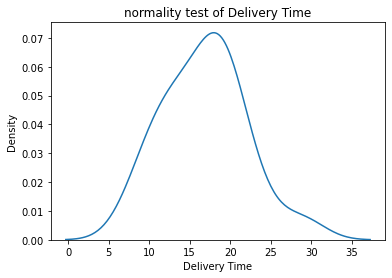

In [62]:
sns.distplot(df["Delivery Time"],hist=False)
plt.title("normality test of Delivery Time")
plt.show()

In [63]:
df["Delivery Time"].skew() 

0.3523900822831107

In [64]:
df["Delivery Time"].kurtosis() 

0.31795982942685397

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


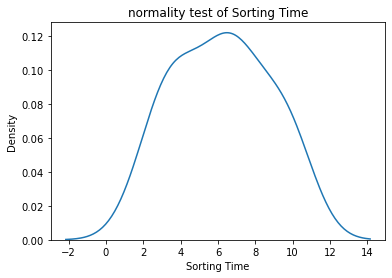

In [65]:
sns.distplot(df["Sorting Time"],hist=False)
plt.title("normality test of Sorting Time")
plt.show()

In [66]:
df["Sorting Time"].skew() 

0.047115474210530174

In [67]:
df["Sorting Time"].kurtosis() 

-1.14845514534878

# 3.2.2) LINEARITY TEST

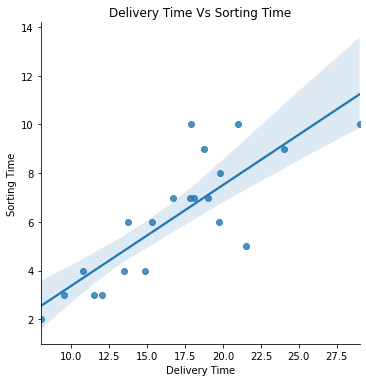

In [68]:
sns.lmplot(x="Delivery Time",y="Sorting Time",data=df)
plt.title("Delivery Time Vs Sorting Time")
plt.show()

In [69]:
rename=df.rename({"Sorting Time":"Sorting_time" , "Delivery Time": "Delivery_time"}, axis=1)
rename

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# 4) MODEL BUILDING

In [70]:
import statsmodels.formula.api as smf
smf_model=smf.ols(formula="Sorting_time~Delivery_time",data=rename).fit()  # sorting time=output || delivery time = input
smf_model

In [71]:
smf_model.params     # (C)=-0.756673  || (M)= 0.413744

Intercept       -0.756673
Delivery_time    0.413744
dtype: float64

# 5) MODEL TESTING

# 5.1) MANUAL TESTING

In [72]:
# y=mx+c   (C)=-0.756673 || (M)=0.413744

# if x= 22
(0.413744*22)+(-0.756673)


8.345695000000001

In [73]:
# if x= 44
(0.413744*44)+(-0.756673)

17.448063

In [74]:
# if x= 18
(0.413744*18)+(-0.756673)

6.690719

# 5.2) MACHINE PREDICTION

In [75]:
data_new=pd.DataFrame({"Delivery_time":[22,44,18]})
data_new

,Delivery_time
0,22
1,44
2,18


In [76]:
Sorting_time=smf_model.predict(data_new)
Sorting_time

0     8.345686
1    17.448046
2     6.690712
dtype: float64

# 6) MODEL DEPLOYMENT

In [77]:
from  pickle import dump

In [78]:
dump(smf_model,open("pickle_new","wb")) # write bytes(wb)

In [79]:
from pickle import load

In [80]:
c=load(open("pickle_new","rb")) # read bytes(rb)

In [81]:
c.predict(data_new)

0     8.345686
1    17.448046
2     6.690712
dtype: float64

# ===============================================================

# B) SALARY HIKE-> BUILD A PREDICTION MODEL FOR SALARY HIKE

## 1) IMPORT LIBRARIES

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2) IMPORT DATA

In [83]:
sal=pd.read_csv("C:\\Users\\DELL\\Downloads\\Salary_Data.csv")
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## 3) DATA UNDERSTANDING

### 3.1) INITIAL ANALYSIS

In [84]:
sal.shape

(30, 2)

In [85]:
sal.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [86]:
sal.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [87]:
sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### 3.2) ASSUMPTION CHECK

#### 3.2.1) NORMALITY TEST
                        1) Distplot
                        2) histogram
                        3) Q-Q plot
                        4) Probability plot

#### NORMALITY TEST BY DISTPLOT

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


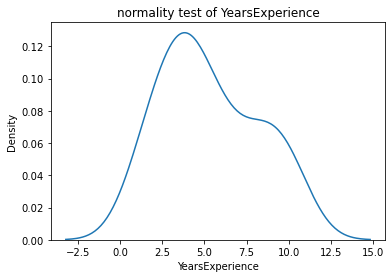

In [88]:
sns.distplot(sal["YearsExperience"],hist=False)
plt.title("normality test of YearsExperience")
plt.show()

In [89]:
sal["YearsExperience"].skew()

0.37956024064804106

In [90]:
sal["YearsExperience"].kurtosis()

-1.0122119403325072

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


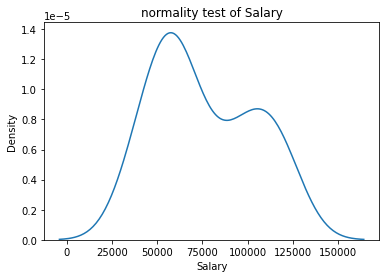

In [91]:
sns.distplot(sal["Salary"],hist=False)
plt.title("normality test of Salary")
plt.show()

In [92]:
sal["Salary"].skew()

0.35411967922959153

In [93]:
sal["Salary"].kurtosis()

-1.295421086394517

#### NORMALITY TEST BY PROBABLITY PLOT

<function matplotlib.pyplot.show(close=None, block=None)>

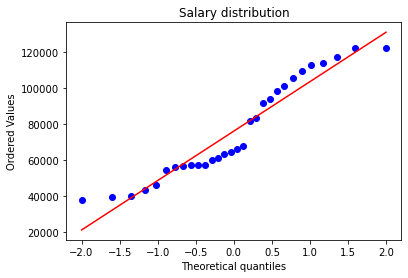

In [94]:
stats.probplot(x=sal["Salary"],dist="norm",plot=plt)
plt.title("Salary distribution")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

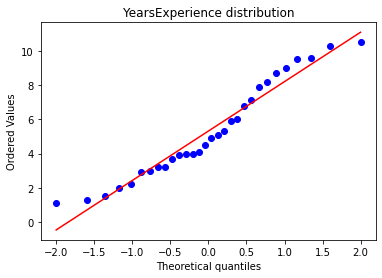

In [95]:
stats.probplot(x=sal["YearsExperience"],dist="norm",plot=plt)
plt.title("YearsExperience distribution")
plt.show

### 3.2.2) LINEARITY TEST

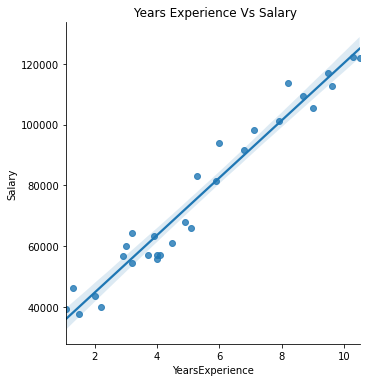

In [96]:
sns.lmplot(x="YearsExperience",y="Salary",data=sal)
plt.title(" Years Experience Vs Salary")
plt.show()

 3.2.3.multi-collinearity test - correlation matrix || [VIF]- Variance Inflation Factor
    
 3.2.4.Auto Regression Test

 3.2.5.Homoscedisticity Test
    
 3.2.6.Zero Resudial Test

# 4) MODEL TRAINING

#   linear regression can be performed by using 2 libraries:
# 1.statsmodels - OLS[Ordinary least Square]
                                        import statsmodels.formula.api as smf 
                                        smf.ols(formula="output~input",data=df).fit() 
# 2.sklearn - LinearRegression()
                              from sklearn.linear_model import LinearRegression
                              linear_model=LinearRegression()                      # object creation / model initialization
                            linear_model.fit(X,Y)

In [97]:
import statsmodels.formula.api as smf
smf_q=smf.ols(formula="Salary~YearsExperience",data=sal).fit()
smf_q

In [98]:
smf_q.params   #(c)intercept =25792.200199   ||(M)YearsExperience = 9449.962321

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

## 5) MODEL TESTING

### 5.1) MANUAL TESTING

In [99]:
# y=mx+c
# if x= 20
(9449.962321*20)+25792.200199

214791.446619

In [100]:
# if x= 4
(9449.962321*4)+25792.200199

63592.049483

In [101]:
# if x= 44
(9449.962321*44)+25792.200199

441590.54232300003

### 5.2) MACHINE PREDICTION

In [102]:
YearsExperience=pd.DataFrame({("YearsExperience"):[20,4,44]})
YearsExperience

,YearsExperience
0,20
1,4
2,44


In [103]:
salary=smf_q.predict(YearsExperience)
salary

0    214791.446628
1     63592.049484
2    441590.542343
dtype: float64

## 6) MODEL DEPLOYMENT

In [104]:
from pickle import dump

In [105]:
dump(smf_q,open("pickle2","wb")) # write bytes(wb)

In [106]:
from pickle import load

In [107]:
d=load(open("pickle2","rb")) # read bytes(rb)
d

In [108]:
d.predict(YearsExperience)

0    214791.446628
1     63592.049484
2    441590.542343
dtype: float64